# 0.线性代数
线性代数是数学的一个分支，它的研究对象是向量、向量空间（或称线性空间）、线性变换和有限维的线性方程组。向量空间是现代数学的一个重要课题；线性代数被广泛地应用于抽象代数和泛函分析中；通过解析几何，线性代数得以被具体表示。线性代数的理论已被泛化为算子理论。由于科学研究中的非线性模型通常可以被近似为线性模型，使得线性代数被广泛地应用于自然科学和社会科学中。

线性关系意即数学对象之间的关系是以一次形式来表达的。例如，在解析几何里，平面上直线的方程是二元一次方程；空间平面的方程是三元一次方程，而空间直线视为两个平面相交，由两个三元一次方程所组成的方程组来表示。含有 n个未知量的一次方程称为线性方程。变于关量是一次的函数称为线性函数。线性关系问题简称线性问题。解线性方程组的问题是最简单的线性问题。其中：
* 线性（linear）指量与量之间按比例、成直线的关系，在数学上可以理解为一阶导数为常数的函数
* 非线性（non-linear）则指不按比例、不成直线的关系，一阶导数不为常数。

线性代数的概念对于理解机器学习背后的原理非常重要，尤其是在深度学习领域中。它可以帮助我们更好地理解算法内部到底是怎么运行的，借此，我们就能够更好的做出决策。所以，理解机器学习具体算法，就不可避免需要精通这些线性代数的概念。
## 0.1.环境、库

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import itertools
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体   
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
x, y, z, t = sp.symbols('x y z t')
k, m, n = sp.symbols('k m n', integer=True)
f, g, h = sp.symbols('f g h', cls=sp.Function)
sp.init_printing()

# 1.行列式
在以往的学习中，我们接触过二元、三元等简单的线性方程组。但是，从许多实践或理论问题里导出的线性方程组常常含有相当多的未知量，并且未知量的个数与方程的个数也不一定相等。

我们先讨论未知量的个数与方程的个数相等的特殊情形。在讨论这一类线性方程组时，我们引入行列式这个计算工具。学习行列式主要就是要能计算行列式的值和求解线性方程组。
>内容提要：
1. 行列式的概念
    1. 二阶与三阶行列式
    2. 全排列及其逆序数
    3. n阶行列式的定义
2. 行列式的性质及计算
    4. 对换
    5. 行列式的性质
    6. 行列式按行（列）展开
3. 线性方程组的求解
    7. 克拉默法则

In [2]:
# common tool function
def getM(var_name,r,c):
    """
    make a sympy s matrix
    :param var_name:the symbol name
    :param r:matrix s rows
    :param c:matrix s cols
    """
    if r>1 and c>1:
        ss=sp.symbols("{0}_{{{{0:{1}}}{{0:{2}}}}}".format(var_name,r,c))        
    elif r==1:
        ss=sp.symbols("{0}_{{0:{1}}}".format(var_name,c))
    elif c==1:
        ss=sp.symbols("{0}_{{0:{1}}}".format(var_name,r))
    else:
        raise Exception('invalid input parameter！')
    return sp.Matrix([ss[i*c:(i+1)*c] for i in range(r)])

In [3]:
getM('a',3,3)

⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤
⎢                                  ⎥
⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥
⎢                                  ⎥
⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦

## 1.1.二阶与三阶行列式
我们从最简单的二元线性方程组出发，探求其求解公式，并设法化简此公式。
### 1.1.1二元线性方程组与二阶行列式
我们定义如下矩阵，构造方程组如下：

In [4]:
xn=2
xa,xb,xx=getM('a',xn,xn),getM('b',xn,1),getM('x',xn,1)
expr=sp.Eq(xa*xx,xb)
expr

⎡a_{{0}{0}}⋅x_{0} + a_{{0}{1}}⋅x_{1}⎤   ⎡b_{0}⎤
⎢                                   ⎥ = ⎢     ⎥
⎣a_{{1}{0}}⋅x_{0} + a_{{1}{1}}⋅x_{1}⎦   ⎣b_{1}⎦

采用高斯消元法求解，当分母项$\not =0$时，该方程组有唯一解，如下：

In [5]:
xa

⎡a_{{0}{0}}  a_{{0}{1}}⎤
⎢                      ⎥
⎣a_{{1}{0}}  a_{{1}{1}}⎦

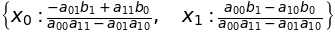

In [6]:
xs=sp.solve(expr,xx)
xs

从方程组解的公式中，能够观察到：
1. 分母相同，有方程组的四个系数确定；
2. 分子、分母都是四个系数分成两对相乘再相减而得。

在此，我们先来引入相关基本符号：
>* $A\in\mathbb{R}^{m\times n}$表示一个$m行n列$的矩阵，并且矩阵$A$中的所有元素都是实数;
* $X\in\mathbb{R}^n$表示一个含有$n$个元素的向量。通常，我们把$n$维向量看成是一个$n行1列$矩阵，即列向量。如果我们想表示一个行向量（$1行n列$矩阵），我们通常写作$x^T$ ($x^T$表示$x$的转置，后面会解释它的定义);
* 一个向量$X$的第i个元素表示为$x_i$:$X=\begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}$;
* $a_{ij}或者a_{i,j}$表示矩阵$A$的$第i行j列$的元素:$A=\begin{bmatrix}a_{11}&\dots&a_{1n}\\\vdots&\ddots&\vdots\\a_{m1}&\dots&a_{mn}\end{bmatrix}$;
* $a_{:,j}$表示$A$矩阵的第$j$列元素:$A=\begin{bmatrix}a_{:,1}&\dots&a_{:,n}\end{bmatrix}$;
* $a_{i,:}$表示$A$矩阵的第$i$行元素:$A=\begin{bmatrix}a_{1,:}\\\vdots\\a_{m,:}\end{bmatrix}$

上述方程组是由矩阵$A$、向量$B$(一维行向量)和解向量$X$组成，方程组解向量$X$的分母由矩阵$A$的元素组成，我们称该分母为矩阵$A$的行列式，符号表述:行列式$D=|A|$。

二阶行列式的计算，采用对角线法则，即矩阵$A$主对角线上的两元素之积，减去副对角线上的两元素之积。

In [7]:
xa,xs,xa[0,0]*xa[1,1]-xa[0,1]*xa[1,0]

⎛⎡a_{{0}{0}}  a_{{0}{1}}⎤  ⎧            -a_{{0}{1}}⋅b_{1} + a_{{1}{1}}⋅b_{0}  
⎜⎢                      ⎥, ⎨x_{0}: ───────────────────────────────────────────
⎝⎣a_{{1}{0}}  a_{{1}{1}}⎦  ⎩       a_{{0}{0}}⋅a_{{1}{1}} - a_{{0}{1}}⋅a_{{1}{0

                a_{{0}{0}}⋅b_{1} - a_{{1}{0}}⋅b_{0}     ⎫                     
──, x_{1}: ─────────────────────────────────────────────⎬, a_{{0}{0}}⋅a_{{1}{1
}}         a_{{0}{0}}⋅a_{{1}{1}} - a_{{0}{1}}⋅a_{{1}{0}}⎭                     

                          ⎞
}} - a_{{0}{1}}⋅a_{{1}{0}}⎟
                          ⎠

我们拓展如下矩阵：

In [8]:
xa0=xa.copy()
xa0[:,0]=xb
xa1=xa.copy()
xa1[:,1]=xb
xa0,xa1

⎛⎡b_{0}  a_{{0}{1}}⎤  ⎡a_{{0}{0}}  b_{0}⎤⎞
⎜⎢                 ⎥, ⎢                 ⎥⎟
⎝⎣b_{1}  a_{{1}{1}}⎦  ⎣a_{{1}{0}}  b_{1}⎦⎠

能够观察到，方程组解的分子，分别是矩阵$A0和A1$的行列式$|A0|和|A1|$

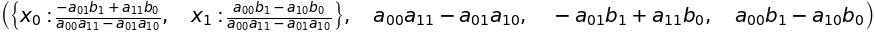

In [9]:
xs,xa.det(),xa0.det(),xa1.det()

综上，线性方程组的解表示为：${{x_0=\frac{|A0|}{|A|},x_1=\frac{|A1|}{|A|}}}$

### 1.1.2.三阶行列式
我们建立如下三元线性方程组

In [10]:
xn=3
xa,xb,xx=getM('a',xn,xn),getM('b',xn,1),getM('x',xn,1)
expr=sp.Eq(xa*xx,xb)
expr

⎡a_{{0}{0}}⋅x_{0} + a_{{0}{1}}⋅x_{1} + a_{{0}{2}}⋅x_{2}⎤   ⎡b_{0}⎤
⎢                                                      ⎥   ⎢     ⎥
⎢a_{{1}{0}}⋅x_{0} + a_{{1}{1}}⋅x_{1} + a_{{1}{2}}⋅x_{2}⎥ = ⎢b_{1}⎥
⎢                                                      ⎥   ⎢     ⎥
⎣a_{{2}{0}}⋅x_{0} + a_{{2}{1}}⋅x_{1} + a_{{2}{2}}⋅x_{2}⎦   ⎣b_{2}⎦

采用高斯消元法求解，当分母项$\not =0$时，该方程组有唯一解，如下：

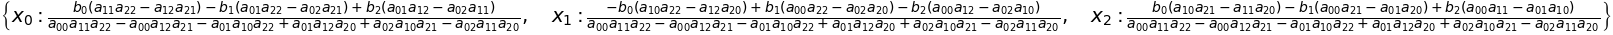

In [11]:
xs=sp.solve(expr,xx)
xs

三元线性方程组的解，由行列式表达如下：

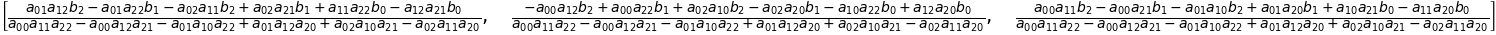

In [12]:
xab=[xa.copy() for _ in range(xn)]
for i in range(xn):xab[i][:,i]=xb
xad=xa.det()
[i.det()/xad for i in xab]

分子化简对比

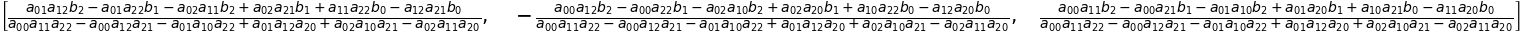

In [13]:
[sp.combsimp(i) for i in xs.values()]

综上，三元线性方程组的解表示为：${{x_0=\frac{|A0|}{|A|},x_1=\frac{|A1|}{|A|},x_2=\frac{|A2|}{|A|}}}$

## 1.2.全排列及其逆序数
把$n$个不同的元素排列成一列，叫做这$n$个元素的**全排列**。$n$个不同元素的所有排列的种数，通常用$P_n$表示,也就是$n$的阶乘$n!=n\cdot (n-1)\dots 3\cdot 2\cdot 1$。

In [14]:
sp.factorial(n),sp.factorial(3)

In [15]:
tuple(itertools.permutations(range(xn),xn))

所有6种不同的排法中，只有$(1,2,3)$中的数字是从小到大的自然顺序排列的，而其他排列中都有大的数排在小的数之前。

>**定义**：对于$n$个不同的元素，从小到大的排序为标准次序-**顺序**，当某两个元素的先后次序与标准次序不同时，就称这两个元素组成一个**逆序**。

例如，在排列$(3,2,5,1,4)$中，$(3,2),(3,1),(2,1),(5,1)和(5,4)$都是逆序。
>**定义**:排列中所有逆序的总数称为此排列的**逆序数**

排列$(i_0,i_1,\dots,i_n)$的逆序数通常记为$t(i_0,i_1,\dots,i_n)$。逆序数为奇数的排列为**奇排列**，逆序数为偶数的排列为**偶排列**。特别的，符合标准次序的排列是偶排列。

计算排列的逆序数的方法：
>设$(i_0,i_1,\dots,i_n)$是$(0,1,2,\dots,n)$这$n+1$个自然数的任一排列，并规定由小到大为标准次序。依次计算$i_0到i_n$,有多少个比$i_x$大的数排在$i_x$前面，记为$t_x$,则此排列的逆序数$t=\sum_{x=0}^nt_x$;

## 1.3.$n$阶行列式的定义
## 1.3.1.$3$阶行列式
对于矩阵$A$的行列式表示为：$|A|$

In [16]:
xa,xa.det()

⎛⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤                                         
⎜⎢                                  ⎥                                         
⎜⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥, a_{{0}{0}}⋅a_{{1}{1}}⋅a_{{2}{2}} - a_{{
⎜⎢                                  ⎥                                         
⎝⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦                                         

                                                                              
                                                                              
0}{0}}⋅a_{{1}{2}}⋅a_{{2}{1}} - a_{{0}{1}}⋅a_{{1}{0}}⋅a_{{2}{2}} + a_{{0}{1}}⋅a
                                                                              
                                                                              

                                                                              
                                                                              
_{{1}{2}}⋅a_{{2}{0}} + a_{{0}{2}}⋅a_{{1}{0}}⋅a_{{2

>总结规律如下：
1. 三阶行列式共有6项，即$3!$项；
2. 每一项都是位于不同行不同列的三个元素的乘积；
3. 每一项都可以写成$a_{0i_0}a_{1i_1}a_{2i_2}$（正负号除外），其中$i_0i_1i_2$是$1,2,3$的某个排列；
4. 当$i_0i_1i_2$是偶排列时，对应的项取正号，反之取负号；

所以，三阶行列式可以写成$|A|=\sum_{i_0i_1i_2}{{(-1)}^{t{(i_0i_1i_2)}}a_{0i_0}a_{1i_1}a_{2i_2}}$，其中$\sum_{i_0i_1i_2}$表示对$1,2,3$的所有排列求和。

二阶行列式有上述类似的规律。下面将行列式推广到一般的情形。
### 1.3.2.$n$阶行列式
$n$阶行列式$\large |A|=\sum_{i_0i_1\dots i_{n-1}}{{(-1)}^{t{(i_0i_1\dots i_{n-1})}}a_{0i_0}a_{1i_1}\dots a_{n-1i_{n-1}}}$
特征如下：
>1. $n阶$行列式共有$n!$项；
2. 每一项都是位于不同行不同列的$n$个元素的乘积；
3. 每一项都可以写成$a_{0i_0}a_{1i_1}\dots a_{n-1i_{n-1}}$（正负号除外）,其中$i_0i_1\dots i_{n-1}$是$0,1,2,\dots ,(n-1)$的某个排列；
4. 当$i_0i_1\dots i_{n-1}$是偶排列时，对应的项取正号，反之取负号；

特例，对于$|-1|$可以有两种解释：
>1. 若理解称绝对值，则$|-1|=+1$;
2. 若理解称一阶行列式，则$|-1|=-1$。

### 1.3.3.特殊行列式
1. 对角行列式：对角矩阵以及斜对角矩阵的行列式称为对角行列式

In [17]:
xn=3
xa=sp.diag(*getM('a',xn,1))
xa,xa.det()

⎛⎡a_{0}    0      0  ⎤                   ⎞
⎜⎢                   ⎥                   ⎟
⎜⎢  0    a_{1}    0  ⎥, a_{0}⋅a_{1}⋅a_{2}⎟
⎜⎢                   ⎥                   ⎟
⎝⎣  0      0    a_{2}⎦                   ⎠

In [18]:
xa[:,::-1],xa[:,::-1].det()

⎛⎡  0      0    a_{0}⎤                    ⎞
⎜⎢                   ⎥                    ⎟
⎜⎢  0    a_{1}    0  ⎥, -a_{0}⋅a_{1}⋅a_{2}⎟
⎜⎢                   ⎥                    ⎟
⎝⎣a_{2}    0      0  ⎦                    ⎠

2. 上三角行列式(主对角下侧元素都为0)

$|A|=\prod_{i=0}^na_{ii}$
3. 下三角行列式(主对角上侧元素都为0)

$|A|=\prod_{i=0}^na_{ii}$

## 1.4.对换
### 1.4.1.定义
>在排列中，将任意两个元素对调，其余的元素不动，这种作出新排列的行为叫做**对换**。特别的，将相邻两个元素对换，叫做**相邻对换**。<br>特性：<br>
1. 相邻对换是对换的特殊情形；
2. 一般的对换可以通过一系列的相邻对换来实现；
3. 如果连续施行两次相同的对换，那么排列就被还原了。
### 1.4.2.对换和排列奇偶性的关系
>1. 定理1，对换改变元素的奇偶性；
2. 推论，奇排列变成标准排列的对换次数为奇数，偶排列变成标准排列的对换次数为偶数；
3. 定理2,$n$阶行列式也可定义为$\large |A|=\sum_{i_0i_1\dots i_{n-1}}{{(-1)}^{t{(i_0i_1\dots i_{n-1})}}a_{i_00}a_{i_11}\dots a_{i_{n-1}n-1}}$;
4. 定理3,$n$阶行列式也可定义为$\large |A|=\sum_{\begin{pmatrix} i_0i_1\dots i_{n-1}\\ j_0j_1\dots j_{n-1}\end{pmatrix}}{{(-1)}^{t{(i_0i_1\dots i_{n-1})}+t{(j_0j_1\dots j_{n-1})}}a_{i_0j_0}a_{i_1j_1}\dots a_{i_{n-1}j_{n-1}}}$

## 1.5.行列式的性质
### 1.5.1.性质
记行列式$D=|A|,D^T=|A^T|$,其中行列式$D^T$为行列式$D$的**转置行列式**。若记$D=det(a_{ij}),D^T=det(b_{ij}),则b_{ij}=a_{ji}$。
#### 1.5.1.1.性质1
行列式与它的转置行列式相等。<br>
证明，根据行列式的定义，有<br>
$\large D^T\\=\sum_{i_0i_1\dots i_{n-1}}{{(-1)}^{t{(i_0i_1\dots i_{n-1})}}b_{0i_0}\dots b_{n-1i_{n-1}}}\\=\sum_{i_0i_1\dots i_{n-1}}{{(-1)}^{t{(i_0i_1\dots i_{n-1})}}a_{i_00}\dots a_{i_{n-1}n-1}}\\=D$

In [19]:
xn=3
xa=getM('a',xn,xn)
xa

⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤
⎢                                  ⎥
⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥
⎢                                  ⎥
⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦

In [20]:
xa.det(),xa.T.det()

In [21]:
xa.det() is xa.T.det()

True

行列式中行与列具有同等的地位，行列式的性质凡是对行成立的对列也同样成立。

#### 1.5.1.2.性质2
互换行列式的两行(列),行列式变号。

In [22]:
xa_=xa.copy()
xa_[0,:],xa_[1,:]=xa_[1,:],xa_[0,:]
xa,xa_

⎛⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤  ⎡a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎤⎞
⎜⎢                                  ⎥  ⎢                                  ⎥⎟
⎜⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥, ⎢a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎥⎟
⎜⎢                                  ⎥  ⎢                                  ⎥⎟
⎝⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦  ⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦⎠

In [23]:
xa.det(),xa_.det()

In [24]:
xa.det()+xa_.det()

**推论**：如果行列式有两行或者两列完全相同，则此行列式为零。<br>
**证明**:互换相同的两行，有$D=-D$,所有$D=0$。

#### 1.5.1.3.性质3
行列式的某一行(列)中所有的元素都乘以同一个倍数$k$，等于数$k$乘以此行列式。

In [25]:
xa_=xa.copy()
xa_[1,:]=xa_[1,:]*xn
xa,xa_

⎛⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤  ⎡ a_{{0}{0}}    a_{{0}{1}}    a_{{0}{2}
⎜⎢                                  ⎥  ⎢                                      
⎜⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥, ⎢3⋅a_{{1}{0}}  3⋅a_{{1}{1}}  3⋅a_{{1}{2
⎜⎢                                  ⎥  ⎢                                      
⎝⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦  ⎣ a_{{2}{0}}    a_{{2}{1}}    a_{{2}{2}

} ⎤⎞
  ⎥⎟
}}⎥⎟
  ⎥⎟
} ⎦⎠

In [26]:
xa_.det()

In [27]:
sp.simplify(xa_.det()/xa.det())

**推论**：行列式的某一行（列）中所有元素的公因子可以提到行列式符号的外面。

#### 1.5.1.4.性质4
行列式中如果有两行（列）元素成比例，则此行列式为零。通过性质2的推论和性质3，容易证明。

In [28]:
xa_=xa.copy()
xa_[0,:]=xa_[2,:]*xn
xa_,xa_.det()

⎛⎡3⋅a_{{2}{0}}  3⋅a_{{2}{1}}  3⋅a_{{2}{2}}⎤   ⎞
⎜⎢                                        ⎥   ⎟
⎜⎢ a_{{1}{0}}    a_{{1}{1}}    a_{{1}{2}} ⎥, 0⎟
⎜⎢                                        ⎥   ⎟
⎝⎣ a_{{2}{0}}    a_{{2}{1}}    a_{{2}{2}} ⎦   ⎠

#### 1.5.1.5.性质5
若行列式的某一列（行）的元素都是两数之和，如下：

In [29]:
xb_=xa.copy()
xb_[:,1]=xb
xa_=xa.copy()
xa_[:,1]=xa_[:,1]+xb_[:,1]
xa,xb_,xa_

⎛⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤  ⎡a_{{0}{0}}  b_{0}  a_{{0}{2}}⎤  ⎡a_{{0
⎜⎢                                  ⎥  ⎢                             ⎥  ⎢     
⎜⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥, ⎢a_{{1}{0}}  b_{1}  a_{{1}{2}}⎥, ⎢a_{{1
⎜⎢                                  ⎥  ⎢                             ⎥  ⎢     
⎝⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦  ⎣a_{{2}{0}}  b_{2}  a_{{2}{2}}⎦  ⎣a_{{2

}{0}}  a_{{0}{1}} + b_{0}  a_{{0}{2}}⎤⎞
                                     ⎥⎟
}{0}}  a_{{1}{1}} + b_{1}  a_{{1}{2}}⎥⎟
                                     ⎥⎟
}{0}}  a_{{2}{1}} + b_{2}  a_{{2}{2}}⎦⎠

则：

In [30]:
sp.simplify(xa_.det()-(xa.det()+xb_.det()))

**验证：**以三阶行列式为例<br>
$\large D\\=\sum_{i_0i_1i_{2}}{{(-1)}^{t{(i_0i_1i_{3})}}a_{0i_0}(a_{1i_1}+b_{1i_1}) a_{2i_{2}}}\\=\sum_{i_0i_1i_{2}}{{(-1)}^{t{(i_0i_1i_{3})}}a_{0i_0}(a_{1i_1})a_{2i_{2}}}+\sum_{i_0i_1i_{2}}{{(-1)}^{t{(i_0i_1i_{3})}}a_{0i_0}(b_{1i_1})a_{2i_{2}}}\\=D_a+D_b$

#### 1.5.1.6.性质6
把行列式的某一列（行）的各元素乘以同一个倍数然后加到另一列（行）对应的元素上去，行列式不变。如下：

In [31]:
xa_=xa.copy()
xa_[0,:]=xa_[0,:]+xa_[2,:]*xn
xa_

⎡a_{{0}{0}} + 3⋅a_{{2}{0}}  a_{{0}{1}} + 3⋅a_{{2}{1}}  a_{{0}{2}} + 3⋅a_{{2}{2
⎢                                                                             
⎢       a_{{1}{0}}                 a_{{1}{1}}                 a_{{1}{2}}      
⎢                                                                             
⎣       a_{{2}{0}}                 a_{{2}{1}}                 a_{{2}{2}}      

}}⎤
  ⎥
  ⎥
  ⎥
  ⎦

In [32]:
sp.simplify(xa.det()-xa_.det())

基于**性质5**和**性质4**，可以得到证明。

### 1.5.2.行列式的应用
计算行列式常用的方法：利用行列式性质的不变性，可以把行列式转化为上三角行列式，从而较容易的获得行列式的值。

In [33]:
# aa=sp.Matrix(np.random.randint(low=0,high=5,size=(3,3)))
aa=sp.Matrix([[2,3,3],[4,2,2],[2,3,1]])
aa

⎡2  3  3⎤
⎢       ⎥
⎢4  2  2⎥
⎢       ⎥
⎣2  3  1⎦

In [34]:
ab=aa.copy()
ab

⎡2  3  3⎤
⎢       ⎥
⎢4  2  2⎥
⎢       ⎥
⎣2  3  1⎦

In [35]:
ab[0,:]=ab[0,:]-ab[2,:]
ab

⎡0  0  2⎤
⎢       ⎥
⎢4  2  2⎥
⎢       ⎥
⎣2  3  1⎦

In [36]:
ab[1,:]=ab[1,:]-ab[0,:]
ab

⎡0  0  2⎤
⎢       ⎥
⎢4  2  0⎥
⎢       ⎥
⎣2  3  1⎦

In [37]:
ab[2,:]=ab[2,:]-1/2*ab[0,:]
ab

⎡0  0  2⎤
⎢       ⎥
⎢4  2  0⎥
⎢       ⎥
⎣2  3  0⎦

In [38]:
ab[1,:]=ab[1,:]-2*ab[2,:]
ab

⎡0  0   2⎤
⎢        ⎥
⎢0  -4  0⎥
⎢        ⎥
⎣2  3   0⎦

In [39]:
ab[2,:]=ab[2,:]+3/4*ab[1,:]
ab

⎡0  0   2⎤
⎢        ⎥
⎢0  -4  0⎥
⎢        ⎥
⎣2  0   0⎦

In [40]:
ab=-ab[[2,1,0],:]
ab

⎡-2  0  0 ⎤
⎢         ⎥
⎢0   4  0 ⎥
⎢         ⎥
⎣0   0  -2⎦

In [41]:
ab[0,0]*ab[1,1]*ab[2,2]

In [42]:
aa.det()

### 1.5.3.小结
行列式的6个性质（行列式中行与列具有同等的地位，凡是对行成立的性质对列也同样成立）。

计算行列式常用方法：
1. 利用定义；
2. 利用性质把行列式化为上三角形行列式，从而算得行列式的值。

## 1.6.行列式按行（列）展开
### 1.6.1. 引子

In [43]:
xn
xa=getM('a',xn,xn)
xa

⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤
⎢                                  ⎥
⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥
⎢                                  ⎥
⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦

In [44]:
sp.collect(xa.det(),xa[0,:])

In [45]:
xa[1:,[1,2]].det(),xa[1:,[2,1]].det(),xa[1:,[0,1]].det()

**结论**：三阶行列式可以用二阶行列式表示。那么是否任意一个行列式都可以用较低的行列式表示？

在$n$阶行列式中，把元素$a_{ij}$所在的第i行和第j列划掉后，留下来的$n-1$阶行列式叫做元素$a_{ij}$的**余子式**,记做$M_{ij}$。把$A_{ij}={(-1)}^{i+j}M_{ij}$称为元素$a_{ij}$的代数余子式。如下：

In [46]:
xa

⎡a_{{0}{0}}  a_{{0}{1}}  a_{{0}{2}}⎤
⎢                                  ⎥
⎢a_{{1}{0}}  a_{{1}{1}}  a_{{1}{2}}⎥
⎢                                  ⎥
⎣a_{{2}{0}}  a_{{2}{1}}  a_{{2}{2}}⎦

由代数余子式组成的伴随矩阵

In [47]:
xa.adjugate().T

⎡a_{{1}{1}}⋅a_{{2}{2}} - a_{{1}{2}}⋅a_{{2}{1}}   -a_{{1}{0}}⋅a_{{2}{2}} + a_{{
⎢                                                                             
⎢-a_{{0}{1}}⋅a_{{2}{2}} + a_{{0}{2}}⋅a_{{2}{1}}  a_{{0}{0}}⋅a_{{2}{2}} - a_{{0
⎢                                                                             
⎣a_{{0}{1}}⋅a_{{1}{2}} - a_{{0}{2}}⋅a_{{1}{1}}   -a_{{0}{0}}⋅a_{{1}{2}} + a_{{

1}{2}}⋅a_{{2}{0}}  a_{{1}{0}}⋅a_{{2}{1}} - a_{{1}{1}}⋅a_{{2}{0}} ⎤
                                                                 ⎥
}{2}}⋅a_{{2}{0}}   -a_{{0}{0}}⋅a_{{2}{1}} + a_{{0}{1}}⋅a_{{2}{0}}⎥
                                                                 ⎥
0}{2}}⋅a_{{1}{0}}  a_{{0}{0}}⋅a_{{1}{1}} - a_{{0}{1}}⋅a_{{1}{0}} ⎦

因为行标和列标可唯一标识行列式的元素，所以行列式中每一个元素都分别对应着一个余子式和一个代数余子式。

**引理：**一个$n$阶行列式，如果其中第i行所有元素除$a_{ij}$外都为零，那么这个行列式等于$a_{ij}$与它的代数余子式的乘积，即$D=a_{ij}A_{ij}$。这是显而易见的。

### 1.6.2.行列式按行（列）展开法则
**定理3**：行列式等于它的任一行（列）的各元素与其对应的代数余子式乘积之和。即：$D=\sum_{x=0}^n(a_{ix}A_{ix}),(i=0,1,\dots,n)$

In [48]:
xa.det(),sp.expand(xa[xn-1,:]*xa.adjugate().T[xn-1,:].T)

(a_{{0}{0}}⋅a_{{1}{1}}⋅a_{{2}{2}} - a_{{0}{0}}⋅a_{{1}{2}}⋅a_{{2}{1}} - a_{{0}{
1}}⋅a_{{1}{0}}⋅a_{{2}{2}} + a_{{0}{1}}⋅a_{{1}{2}}⋅a_{{2}{0}} + a_{{0}{2}}⋅a_{{
1}{0}}⋅a_{{2}{1}} - a_{{0}{2}}⋅a_{{1}{1}}⋅a_{{2}{0}}, [a_{{0}{0}}⋅a_{{1}{1}}⋅a
_{{2}{2}} - a_{{0}{0}}⋅a_{{1}{2}}⋅a_{{2}{1}} - a_{{0}{1}}⋅a_{{1}{0}}⋅a_{{2}{2}
} + a_{{0}{1}}⋅a_{{1}{2}}⋅a_{{2}{0}} + a_{{0}{2}}⋅a_{{1}{0}}⋅a_{{2}{1}} - a_{{
0}{2}}⋅a_{{1}{1}}⋅a_{{2}{0}}])

In [49]:
xa.det()==sp.expand(xa[xn-1,:].dot(xa.adjugate().T[xn-1,:]))

True

**推论：**行列式任一行（列）的元素与另一行（列）的对应元素的代数余子式乘积之和等于零（基于性质4）。即：$D=\sum_{x=0}^n(a_{ix}A_{jx})=0,(i,j=0,1,\dots,n,i\not =j)$

**分析：**我们以3阶行列式为例。<br>
$a_{11}A_{11}+a_{12}A_{12}+a_{13}A_{13}=\begin{vmatrix}a_{11}&a_{12}&a_{13}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33} \end{vmatrix}$<br>
把第一行的元素换成第二行的对应元素，则：<br>
${\color{Red}{a_{21}}}A_{11}+a_{122}A_{12}+a_{23}A_{13}=\begin{vmatrix}{\color{Red}{a_{21}}}&a_{22}&a_{23}\\a_{21}&a_{22}&a_{23}\\a_{31}&a_{32}&a_{33} \end{vmatrix}=0$<br>

## 1.7.克拉默法则
对于如下，二元线性方程组

In [50]:
xn=2
xa,xb,xx=getM('a',xn,xn),getM('b',xn,1),getM('x',xn,1)
expr=sp.Eq(xa*xx,xb)
expr

⎡a_{{0}{0}}⋅x_{0} + a_{{0}{1}}⋅x_{1}⎤   ⎡b_{0}⎤
⎢                                   ⎥ = ⎢     ⎥
⎣a_{{1}{0}}⋅x_{0} + a_{{1}{1}}⋅x_{1}⎦   ⎣b_{1}⎦

若令:

In [51]:
xd=[xa.copy() for _ in range(xn+1)]
xd[1][:,0]=xb
xd[2][:,1]=xb
xd

⎡⎡a_{{0}{0}}  a_{{0}{1}}⎤  ⎡b_{0}  a_{{0}{1}}⎤  ⎡a_{{0}{0}}  b_{0}⎤⎤
⎢⎢                      ⎥, ⎢                 ⎥, ⎢                 ⎥⎥
⎣⎣a_{{1}{0}}  a_{{1}{1}}⎦  ⎣b_{1}  a_{{1}{1}}⎦  ⎣a_{{1}{0}}  b_{1}⎦⎦

则上述二元线性方程组的解可表示为：

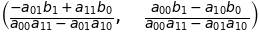

In [52]:
xd[1].det()/xd[0].det(),xd[2].det()/xd[0].det()

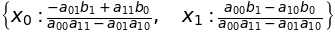

In [53]:
sp.solve(expr,xx)

### 1.7.1.克拉默法则
如果线性方程组：<br>
$\begin{cases} a_{11}x_{1}+\dots+a_{1n}x_{n}=b_{1}\\\dots\\  a_{n1}x_{1}+\dots+a_{nn}x_{n}=b_{n}\end{cases}$<br>
的系数行列式不等于零，即<br>
$D=\begin{vmatrix} a_{11}&\dots&a_{1n}\\\vdots&\ddots&\vdots\\a_{n1}&\dots&a_{nn}\end{vmatrix}\not=0$<br>
那么线性方程组有解且解是唯一的，解可以表示成：<br>
$x_1=\frac{D_1}{D},\dots,x_n=\frac{D_n}{D}$<br>
其中，$D_j$是把系数行列式$D$中第$j$列的元素用方程组右端的常数项代替后所得到的$n$阶行列式，即<br>
$D_j=\begin{vmatrix} a_{11}&\dots&a_{1,j-1}&b_{1}&a_{1,j+1}&\dots&a_{1n}\\\vdots&\ddots&\vdots&\vdots&\vdots&\ddots&\vdots\\a_{n1}&\dots&a_{n,j-1}&b_{1}&a_{n,j+1}&\dots&\vdots\end{vmatrix}$<br>
定理中包含着三个结论：
1. 方程组有解；
2. 解是唯一的；
3. 解可以由上面的公式给出。

这三个结论是有联系的。应该注意，该定理所讨论的只是系数行列式不为零的方程组，至于系数行列式等于零的情形，将在后面的一般情形中一并讨论。

### 1.7.2.关于克拉默法则的等价命题
设$\begin{cases} a_{11}x_{1}+\dots+a_{1n}x_{n}=b_{1}\\\dots\\  a_{n1}x_{1}+\dots+a_{nn}x_{n}=b_{n}\end{cases}$<br>
>**定理4**：如果上述线性方程的系数行列式不等于零，则该线性方程组一定有解，而且解是唯一的。<br>
**定理$4^{'}$**：如果线性方程组无解或有两个不同的解，则它的系数行列式必为零。

常数项全为零的线性方程组称为**齐次线性方程组**，否则称为**非齐次线性方程组**。

齐次线性方程组总是有解的，因为$(0,0,\dots,0)$就是一个解，称为**零解**。因此，齐次线性方程组一定有零解，但不一定有非零解。

我们关心的问题是，齐次线性方程组除零解以外是否存在着非零解。

齐次线性方程组的相关定理：
>* **定理5**：如果齐次线性方程组的系数行列式$D\not=0$，则齐次线性方程组只有零解，没有非零解。
* **定理$5^{'}$**：如果齐次线性方程组有非零解，则它的系数行列式必为零。

备注：
>1. 这两个结论说明系数行列式等于零是齐次线性方重组有非零解的必要条件。
2. 在后面还将证明这个条件也是充分的。即：齐次线性方程组有非零解$\leftrightarrow $系数行列式等于零。

问：当线性方程组的系数行列式为零时，能否用克拉默法则解方程组？为什么？此时方程组的解为何？<br>
答：当线性方程组的系数行列式为零时，不能用克拉默法则解方程组，因为此时方程组的解为无解或有无穷多解。

### 1.7.3.小结
1. 用克拉默法则解线性方程组的两个条件：
    1. 方程个数等于未知量个数；
    2. 系数行列式不等于零。
2. 克拉默法则的意义主要在于建立了线性方程组的解和已知的系数以及常数项之间的关系。它主要适用于理论推导。